<h1>Test with synthetic data</h1>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML

from multifile_lda import MultifileLDA
from multifile_analysis import MultifileAnalysis
from multifile_viz import MultifileLDAViz
from lda_generate_data import LdaDataGenerator

<h2>1. Generate some synthetic data</h2>

In [2]:
K = 10
n_docs = 100
vocab_size = 200
document_length = 100
copies = 4

alpha = 0.1
beta = 0.01    

In [3]:
gen = LdaDataGenerator(alpha, make_plot=True)

Generating count matrices


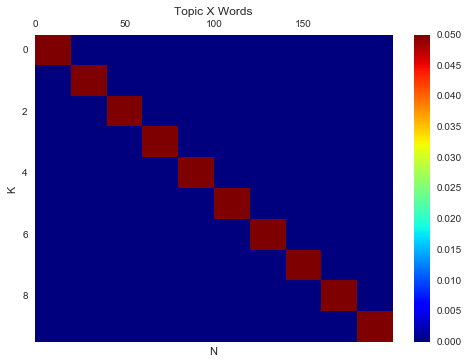

(100, 200)


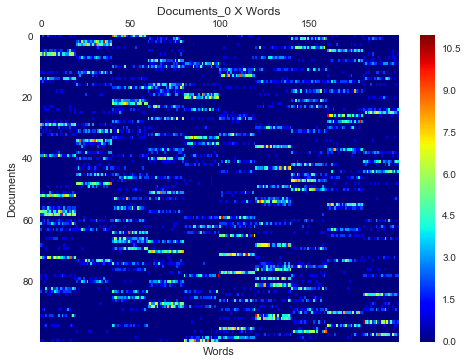

(100, 200)


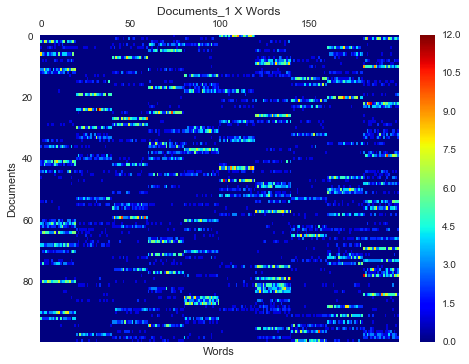

(100, 200)


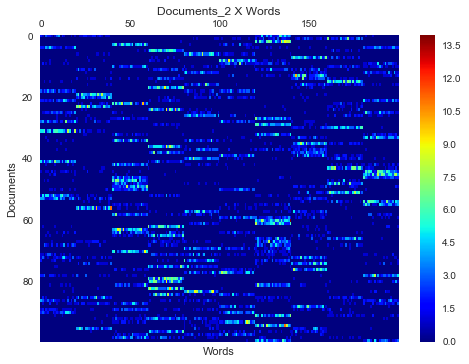

(100, 200)


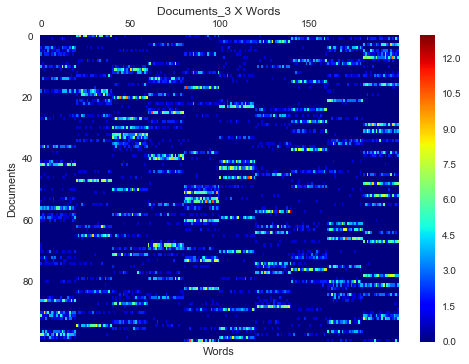

In [4]:
counts, vocab = gen.generate_input_counts(K, vocab_size, document_length, n_docs, copies)

In [5]:
print vocab[0:10]

['word_0' 'word_1' 'word_2' 'word_3' 'word_4' 'word_5' 'word_6' 'word_7'
 'word_8' 'word_9']


<h2>2. Run LDA</h2>

In [6]:
lda = MultifileLDA(counts, vocab)
n_samples = 200
n_burn = 100
n_thin = 5
lda.run(K, alpha, beta, n_burn, n_samples, n_thin)

Initialising 
 - file 0 ..........
 - file 1 ..........
 - file 2 ..........
 - file 3 ..........

Using Numpy for multi-file LDA sampling
Burn-in     1 ..  Log likelihood = -311223.872 
Burn-in     2 ..  Log likelihood = -298059.331 
Burn-in     3 ..  Log likelihood = -275038.394 
Burn-in     4 ..  Log likelihood = -242775.734 
Burn-in     5 ..  Log likelihood = -212839.922 
Burn-in     6 ..  Log likelihood = -192749.525 
Burn-in     7 ..  Log likelihood = -181316.523 
Burn-in     8 ..  Log likelihood = -174304.691 
Burn-in     9 ..  Log likelihood = -170604.568 
Burn-in    10 ..  Log likelihood = -167767.751 
Burn-in    11 ..  Log likelihood = -166630.200 
Burn-in    12 ..  Log likelihood = -165939.650 
Burn-in    13 ..  Log likelihood = -165349.439 
Burn-in    14 ..  Log likelihood = -164814.571 
Burn-in    15 ..  Log likelihood = -164484.372 
Burn-in    16 ..  Log likelihood = -164301.183 
Burn-in    17 ..  Log likelihood = -164205.750 
Burn-in    18 ..  Log likelihood = -164153.74

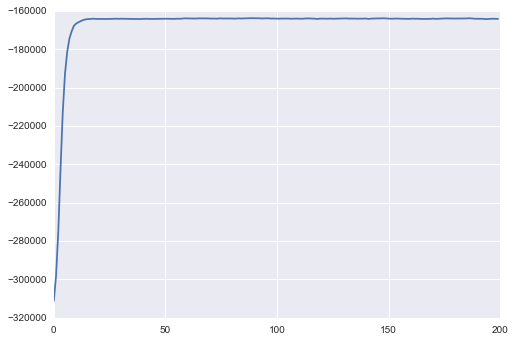

In [7]:
plt.plot(lda.log_likelihoods)

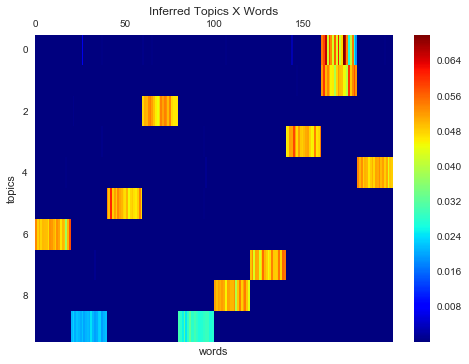

In [8]:
gen._plot_nicely(lda.topic_word_, 'Inferred Topics X Words', 'words', 'topics')

In [9]:
pa = lda.posterior_alphas
print len(pa)

20


In [10]:
analysis = MultifileAnalysis()
analysis.load_synthetic(counts, vocab, lda)
viz = MultifileLDAViz(analysis)

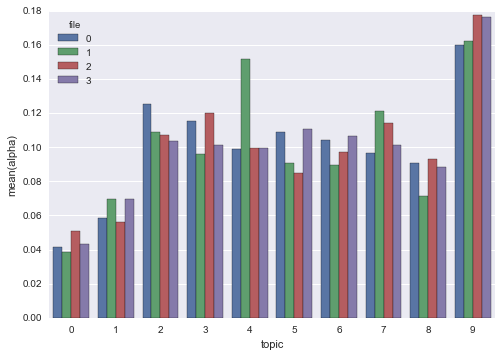

In [11]:
df = viz.plot_e_alphas()

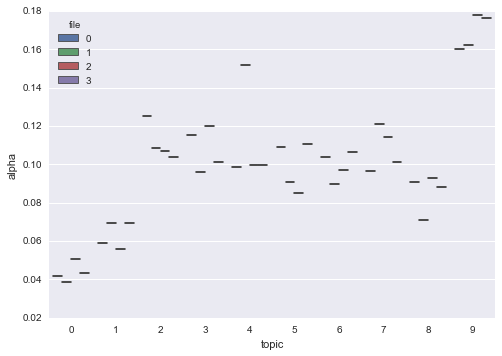

In [12]:
df = viz.plot_boxplot_alphas()